<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kinematics" data-toc-modified-id="Kinematics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kinematics</a></span></li><li><span><a href="#Definitions" data-toc-modified-id="Definitions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Definitions</a></span></li><li><span><a href="#Kinematics-for-a-simple-two-link-robot:-The-ArtyBot" data-toc-modified-id="Kinematics-for-a-simple-two-link-robot:-The-ArtyBot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Kinematics for a simple two-link robot: The ArtyBot</a></span></li><li><span><a href="#ArtyBot-Forward-Kinematics-with-trigonometry-alone" data-toc-modified-id="ArtyBot-Forward-Kinematics-with-trigonometry-alone-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ArtyBot Forward Kinematics with trigonometry alone</a></span></li><li><span><a href="#ArtyBot-Forward-Kinematics-using-Homogeneous-Transformations" data-toc-modified-id="ArtyBot-Forward-Kinematics-using-Homogeneous-Transformations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ArtyBot Forward Kinematics using Homogeneous Transformations</a></span></li><li><span><a href="#ArtyBot-Inverse-Kinematics" data-toc-modified-id="ArtyBot-Inverse-Kinematics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ArtyBot Inverse Kinematics</a></span></li><li><span><a href="#General-approach-to-inverse-kinematics" data-toc-modified-id="General-approach-to-inverse-kinematics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>General approach to inverse kinematics</a></span></li></ul></div>

## Kinematics

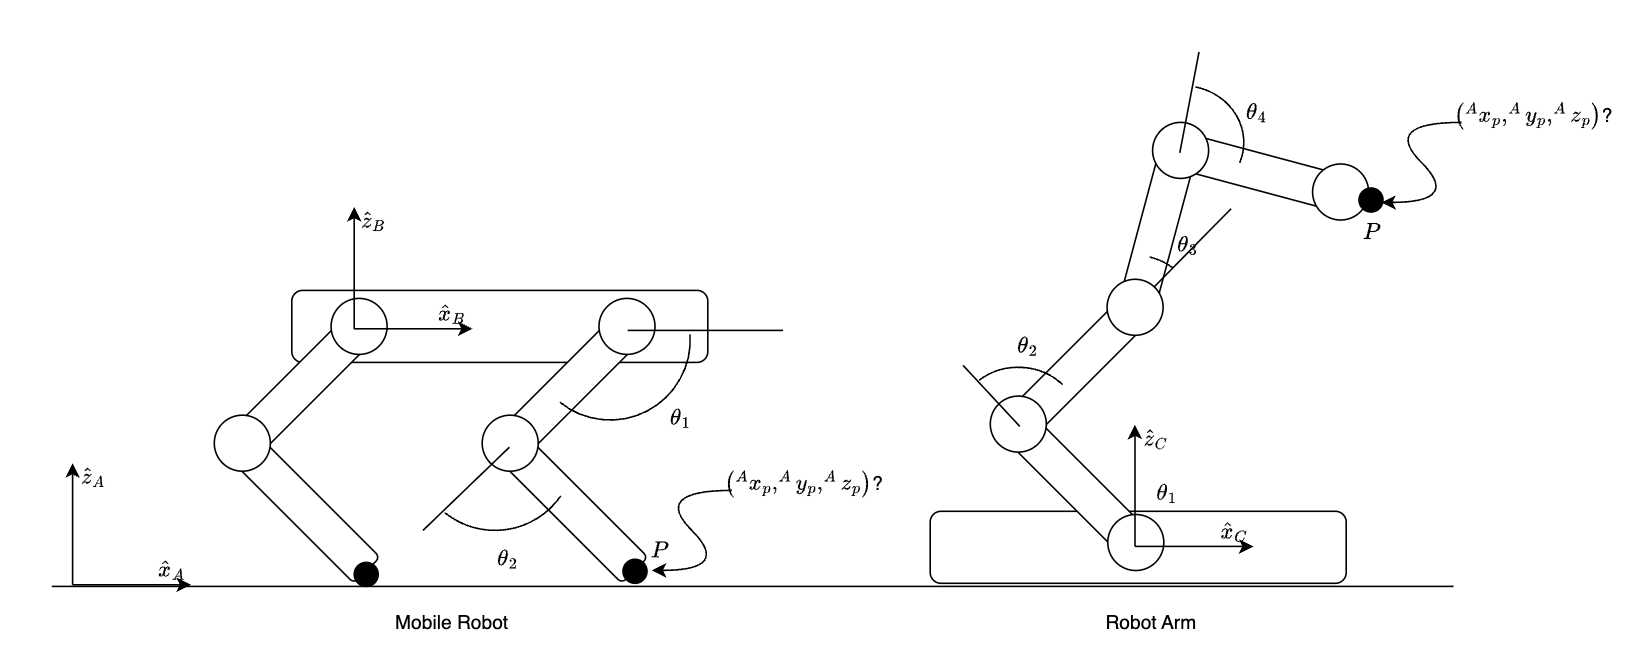

<p style="text-align:center"> <b>Figure 1: Example robots and the relationship between task and configuration space</b> </p>

*Kinematics* Is, simply put, the study of robot geometry. In order to understand the relationship between a robot's *end effector* (for example a foot on a quadruped robot, or the scalpel on an a surgical robot arm) and the allocentric coordinate frame, we have to understand how a robot's *joint angles* map to positions in space. 

In particular, we will study two types of kinematics in ES302:

* **Forward Kinematics**, or the mapping between joint angles and end-effector coordinates (joint angles are the *independent variables*, while end-effector position is the *dependent* variable)
* **Inverse Kinematics**, or the mapping between a desired end-effector location and joint angles (end-effector position is the *independent* variable, while joint angles are the *dependent variables*)

*Forward Kinematics* is useful for understanding how movements of a robot's motors will affect an end effector's position, and *Inverse Kinematics* is useful for taking "goal" positions for an end-effector and turning those into sets of desired position commands for the robot's motors.

Inverse kinematics is, in general, much more challenging. This is because depending on a robot's *configuration* (the specific makeup and geometry of its joints and links), it's very possible that there are multiple sets of joint angles that could achieve a particular end-effector position. It's also possible that you could ask the robot to place its end effector at a location that it cannot reach! This makes inverse kinematics much more difficult.

**Note that the material in this notebook is an abridged and adapted (for ES302 and our robots) version of a more complete treatment of kinematics given in Chapter 3 of your textbook.**

## Definitions

* A robot composed of rigid links connected by common joints (revolute 'hinges', prismatic 'sliders', 'spherical joints', etc) is called a [kinematic chain](https://en.wikipedia.org/wiki/Kinematic_chain#:~:text=In%20mechanical%20engineering%2C%20a%20kinematic,using%20forward%20and%20inverse%20kinematics.). Robots with the same "kinematic chain" are considered familial and have common (or similar) solutions to the inverse kinematics problem.
* A robot's **"end effector"** is the (or a) point on the robot that is used to interact with its environment. For some robots, this could be obvious (the claw on the Romi, for example), but sometimes a robot may have more than one end effector, or we could treat an arbitrary point on the robot as an end effector.
* The **"task space"** is the cartesian (3D) space in which "goal positions" for an end effector are specified. A complete "task space" description is a 3D position + a 3D rotation-- in other words, a "frame!"
* The **configuration space** is the space in which robot joint angles and/or positions are specified. 
* A robot's **configuration** is a complete set of robot joint angles and/or positions. 
* A robot's **degrees of freedom** is the number of independent *generalized* directions in the *configuration space* in which a robot can move.
* A robot's **workspace** is the complete set of positions and orientations that the robot can "reach," specified in the **task space** (cartesian coordinates).

## Kinematics for a simple two-link robot: The ArtyBot

In your ES302_Webots repository, you will find an "Artybot World." This world provides a simulated version of the open-source [artybot](https://www.thingiverse.com/thing:989931#google_vignette) from Thingiverse. The ArtyBot is a "RRR"-type robot, meaning that its kinematic chain consists of four bodies connected by three (R)evolute joints, or "hinge joints."

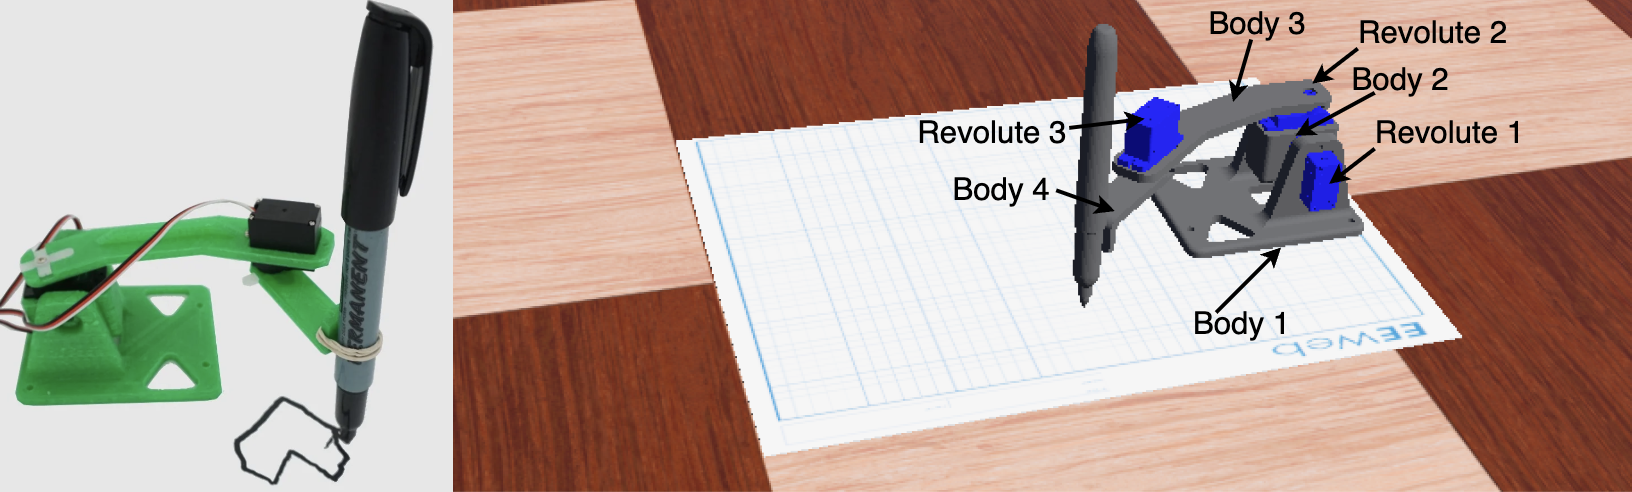

<p style="text-align:center"> <b>Figure 2: The ArtyBot in real life and in Webots</b> </p>

The ArtyBot's RRR-type kinematic chain allows each of the ArtyBot's three servo motors to operate one of the robot's "degrees of freedom." For now, we will simplify the ArtyBot even further and consider it an "RR"-type robot, with only three rigid bodies (including the non-moving body) connected by *two* revolute joints. This means that we will ignore "servo 1," which is the servo that can lift ArtyBot's pen off of the paper. We will look at a simplified version of the robot from a top view, shown below. It includes only links 2 and 3, and servo angles 2 and 3. This means that the "configuration" of the simplified ArtyBot is given by the set $\left\{\theta_2,\theta_3\right\}$.

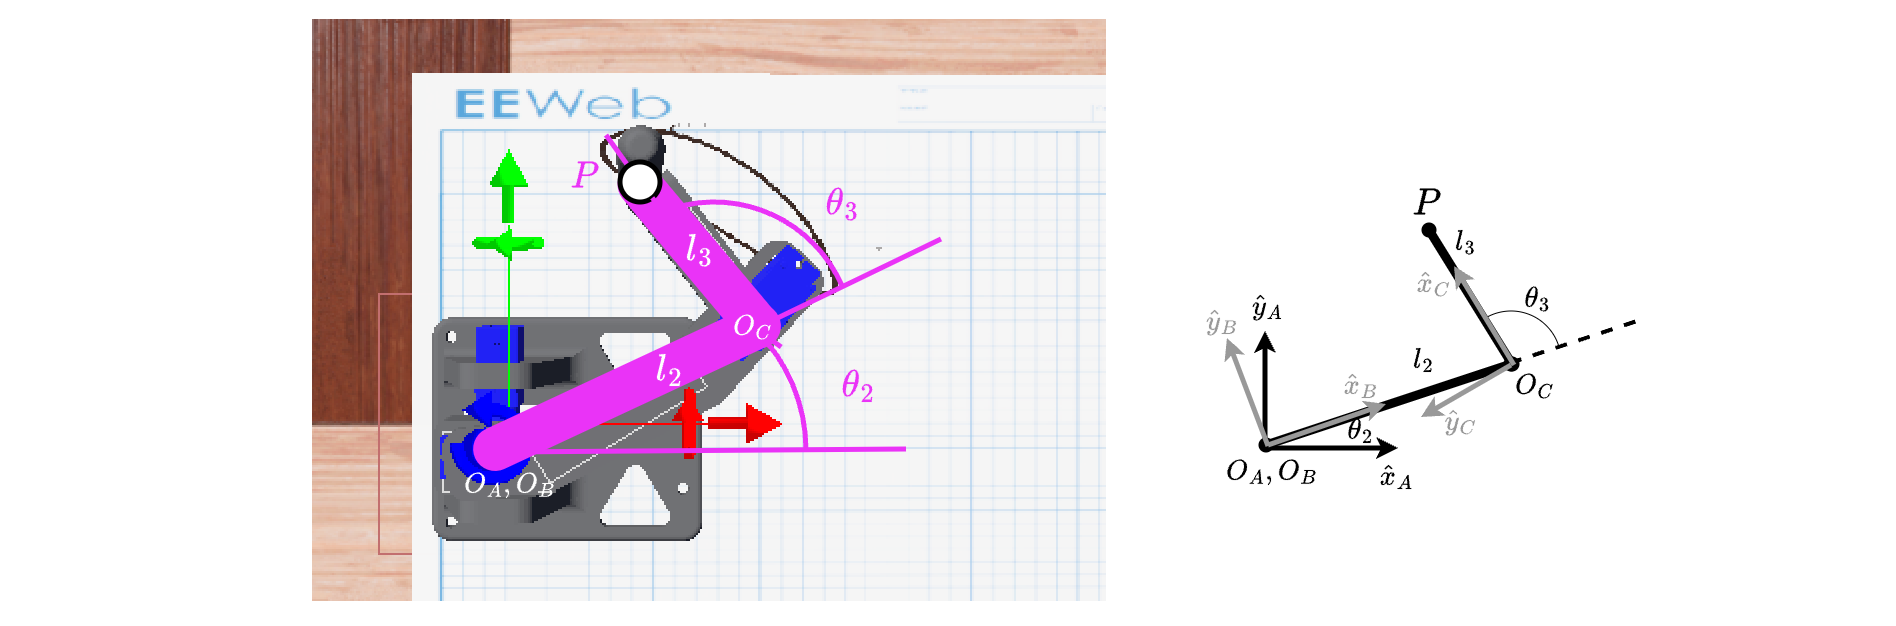

<p style="text-align:center"> <b>Figure 3: Frames and geometry of the simplified (planar) ArtyBot</b> </p>

## ArtyBot Forward Kinematics with trigonometry alone

Using basic trigonometry, we relate angles $\theta_2$ and $\theta_3$ to the allocentric coordinates of $P$, or $^Ax_P,^Ay_P$. Try deriving this on your own!

\begin{equation}
^Ax_P = l_2\cos\theta_2 + l_3\cos\left(\theta_2+\theta_3\right)
\end{equation}
\begin{equation}
^Ay_P = l_2\sin\theta_2 + l_3\sin\left(\theta_2+\theta_3\right)
\end{equation}

This is a complete mapping of the *configuration* of Artybot specified by joint angles $\theta_1,\theta_2$ to the end-effector's position in task space (the allocentric frame $A$), so this completes the analysis of ArtyBot's *forward kinematics*.

These formulae do not leverage any of what we have learned so far about coordinate transforms and frames of reference. This means that for more complicated robots, "manually" deriving equations for forward kinematics can become very difficult very quickly. The good news is that leveraging homogeneous transformations, while it may seem like "more work" for a simple robot like ArtyBot, can make forward kinematics easy for even the most complicated kinematic chains.

## ArtyBot Forward Kinematics using Homogeneous Transformations

Figure 3 shows three frames relevant to the kinematic analysis of the planar ArtyBot:
1. Frame $A$, or the allocentric (global, fixed) frame. This is the **task space** frame because when the ArtyBot is asked to move the pen to a point, we would give this point's coordinates in a fixed reference frame attaached to, for example, a piece of paper.
2. Frame $B$, or the frame attached to link 2, with length $l_3$.
3. Frame $C$, or the frame attached to link 3, with length $l_3$. This is the frame in which the end effector's position is most easily specified.

In frame $C$, the end effector (pen) position is simply specified as:

\begin{equation}
^C \vec{P} = l_3\hat{x}_C
\end{equation}

In 2D, we can write a homogeneous version of the vector $^C\vec{P}$ by appending a "1" to the vector as follows:

\begin{equation}
^C\vec{P}_h = \begin{bmatrix}^Cx_p \\ ^Cy_p \\ 1 \end{bmatrix} = \begin{bmatrix}l_3 \\ 0 \\ 1 \end{bmatrix}
\end{equation}

To transform $P$'s position into the allocentric frame, we can use what we have learned about homogeneous transformations.

\begin{equation}
^A \vec{P}_h = _B^AT(\theta_2) \cdot _C^BT(l_2,\theta_3) ^C\vec{P}_h
\end{equation}

In this equation, we note explicitly that the transformation $_B^AT(\theta_2)$ will be a function of $\theta_2$ only, and that the transformation $_C^BT(l_2,\theta_3)$ will be a function of $l_3$ and $\theta_3$ only. This isn't always the case, but for ArtyBot, we know that frame $A$ and frame $B$ have coincident origins, and that they are separated by a rotation of $\theta_2$. We also know that frame $C$'s origin is separated from frame $B$'s origin by a distance of $l_2$, and that the two are separated by a rotation of $\theta_3$.

Using a 2D formulation for our homogeneous transformations, we can construct each of them as shown below.

\begin{equation}
\begin{aligned}
 ^B_CT(l_2,\theta_3) &= \left[ \begin{array}{cc|c} _C^BR(\theta_3) & & ^B\vec{O}_C \\ \hline 0& 0& 1 \end{array}\right] \\
 &= \left[ \begin{array}{cc|c} \begin{bmatrix}\cos\theta_3 & -\sin\theta_3 \\ \sin\theta_3 & \cos \theta_3 \end{bmatrix} & & \begin{bmatrix} l_2 \\ 0 \end{bmatrix} \\ \hline 0& 0& 1 \end{array}\right]
 \end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
 ^A_BT(\theta_2) &= \left[ \begin{array}{cc|c} _B^AR(\theta_2) & & ^A\vec{O}_B \\ \hline 0& 0& 1 \end{array}\right] \\
 &= \left[ \begin{array}{cc|c} \begin{bmatrix}\cos\theta_2 & -\sin\theta_2 \\ \sin\theta_2 & \cos \theta_2 \end{bmatrix} & & \begin{bmatrix} 0 \\ 0 \end{bmatrix} \\ \hline 0& 0& 1 \end{array}\right]
 \end{aligned}
\end{equation}

With these two transformations set up properly, we can concatenate (multiply) them to perform the total transformation given in Equation 5. 

\begin{equation}
^A \vec{P}_h = \left[ \begin{array}{cc|c} \begin{bmatrix}\cos\theta_2 & -\sin\theta_2 \\ \sin\theta_2 & \cos \theta_2 \end{bmatrix} & & \begin{bmatrix} 0 \\ 0 \end{bmatrix} \\ \hline 0& 0& 1 \end{array}\right] \cdot \left[ \begin{array}{cc|c} \begin{bmatrix}\cos\theta_3 & -\sin\theta_3 \\ \sin\theta_3 & \cos \theta_3 \end{bmatrix} & & \begin{bmatrix} l_2 \\ 0 \end{bmatrix} \\ \hline 0& 0& 1 \end{array}\right] \cdot \begin{bmatrix} l_3 \\ 0 \\ 1 \end{bmatrix}
\end{equation}

Note that this **had better give us the same answer as equations 1 and 2** for the position of $P$. If you look at the transformation matrices, this might seem unlikely, but the key is that after both transformations have been applied, we can simplify the result using the [angle addition identity](https://en.wikipedia.org/wiki/List_of_trigonometric_identities#Angle-sum-and-difference-identities).

**In general, this approach can be used for any open kinematic chain**, no matter how many frames are involved, and it can be used in either 2D or 3D.

## ArtyBot Inverse Kinematics

The goal of an *inverse kinematics* (IK) analysis is to predict the required *robot configuration* (joint angles and/or positions) given the allocentric coordinates ("task space" coordinates) of an end effector. For the ArtyBot, this means that $\theta_1,\theta_2$ will be our *dependent* variables, and $^Ax_p,^Ay_p$ will be our *independent variables*.

While we *could* use equations 1 and 2 to solve for unknowns $\theta_1,\theta_2$  given knowns $^Ax_p,^Ay_p$, we will take a slightly different approach. Inverse kinematic solutions are often unique to a particular kinematic chain, sometimes do not have easily-obtainable general analytical solutions, and are often computed numerically rather than analytically. We're actually lucky that the solution for a planar, RR-type kinematic chain like our simplified ArtyBot is tractable and relatively easy.

The approach we will take for the ArtyBot is specific to a two-link kinematic chain has applications to the solutions of many planar IK problems, including *closed kinematic chains* such as [four bar linkages](https://en.wikipedia.org/wiki/Four-bar_linkage). 

To begin, we will consider the geometry shown below in Figure 4.

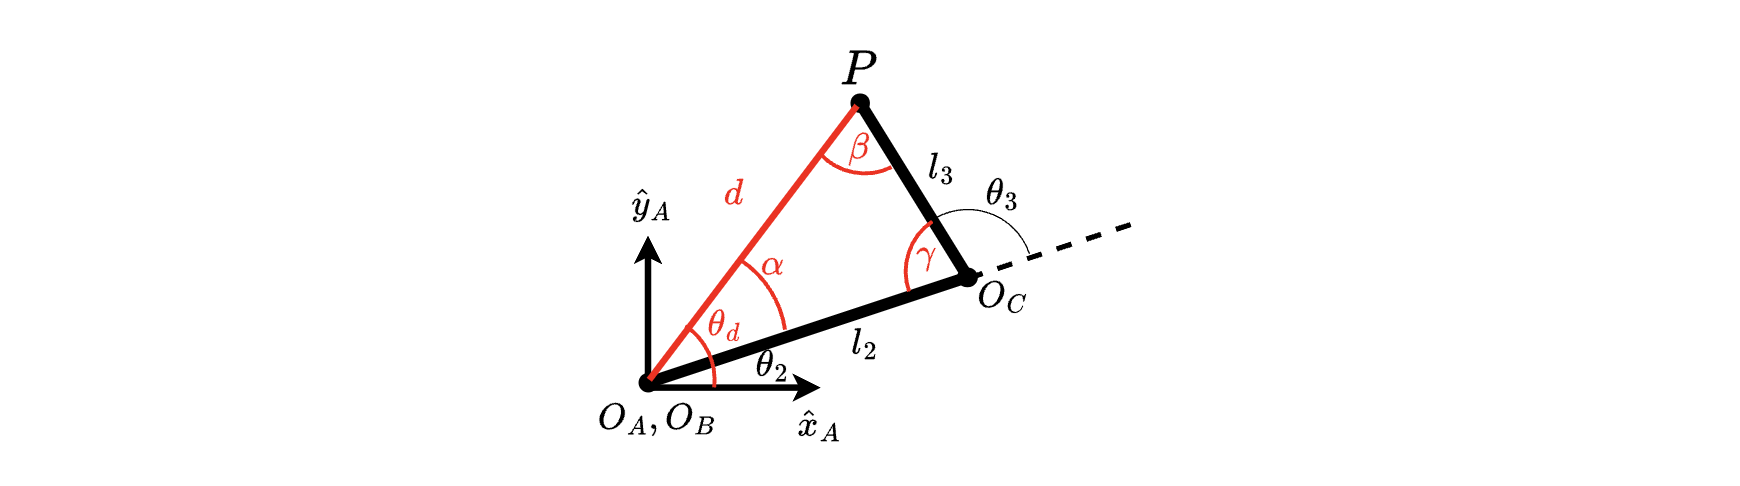

<p style="text-align:center"> <b>Figure 4: Trigonometric setup of ArtyBot Inverse Kinematics</b> </p>

We can easily compute an equation for $d$ given the known coordinates $^Ax_p,^Ay_p$.

\begin{equation}
d = \sqrt{^Ax_p^2+^Ay_p^2}
\end{equation}

Then, we can compute the angle $\theta_d = \alpha+\theta_2$:

\begin{equation}
\theta_d = \theta_2+\alpha = \tan^{-1}\frac{^Ay_p}{^Ax_p}
\end{equation}

We can then use the [Law of Cosines](https://en.wikipedia.org/wiki/Law_of_cosines) to find $\gamma$ based on known lengths $l_2,l_3,d$. 

The Law of Cosines states:

\begin{equation}
d^2 = l_2^2 + l_3^2 - 2l_2l_3 \cos \gamma
\end{equation}

Therefore, $\gamma$ is given by:

\begin{equation}
\gamma = \cos^{-1} \left(\frac{1}{2l_2l_3} \left(l_2^2+l_3^2-d^2\right)\right)
\end{equation}

By inspection, we can see that:
\begin{equation} \theta_2 = \pi-\gamma\end{equation}

In summary, this gives the following equation for $\theta_2$:

\begin{equation}
\theta_2 = \pi - \cos^{-1} \left(\frac{1}{2l_2l_3} \left(l_2^2+l_3^2-\: ^Ax_p^2-\: ^Ay_p^2\right)\right)
\end{equation}

and we can use the same approach to find $\theta_1$ by first finding $\alpha$.

\begin{equation}
\alpha = \cos^{-1} \left(\frac{1}{2l_2d} \left(d^2+l_2^2-l_3^2\right)\right)
\end{equation}

Then, using equations 9 and 10, we can find $\theta_1$.

\begin{equation}
 \theta_1 = \tan^{-1}\frac{^Ay_p}{^Ax_p} - \cos^{-1} \left(\frac{1}{2l_2\sqrt{^Ax_p^2 +\:^Ay_p^2}} \left(^Ax_p^2 +\:^Ay_p^2+l_2^2-l_3^2\right)\right)
\end{equation}

Note that there a limitations to the *domain* of this solution, but it will work as long as the triangle formed by $O_AO_C P$ looks as shown in Figure 4.

## General approach to inverse kinematics

Because analytical approaches to inverse kinematics often involve "tricks" and specialized solutions, it can be challenging to arrive at a generalizable approach to IK problems. Luckily, there are mature numerical approaches to iteratively solving for a robot's configuration based on a known goal in task space.

We will not cover the theory behind those approaches in this class. Instead, I want to point you to a flexible, powerful library for forward and inverse kinematics called "[TriP Kinematics](https://trip-kinematics.readthedocs.io/en/main/index.html)."

This library's documentation page covers how to install the library and how to use it to model kinematic chains. to install trip, use:

`pip install trip-kinematics`

You can probably ignore any version warnings given. Make sure you also install 'casadi' using:

`pip install casadi`

I have constructed a (hopefully) well-commented example script below that should explain how to use the library to model a kinematic chain, and then how to use TriP's built-in IK solver to do inverse kinematics on any chain of your choice.

In [1]:
#prerequisite libraries for working with TriP kinematics library
from math import radians
from typing import Dict
from casadi import SX, nlpsol, vertcat
import numpy as np

#solver class built in to trip
from trip_kinematics.Solver import SimpleInvKinSolver
#kinematic group class (used for constructing robots)
from trip_kinematics.KinematicGroup import KinematicGroup
#transformation class (used for constructing transformations)
from trip_kinematics.Transformation import Transformation
#robot class from trip. Renamed here to avoid conflics with WeBots
from trip_kinematics.Robot import Robot as TriPRobot #do this to avoid confusion with Webots Robot class
#other utility classes inside TriP
from trip_kinematics.Utility import hom_translation_matrix, x_axis_rotation_matrix
from trip_kinematics.Utility import y_axis_rotation_matrix, z_axis_rotation_matrix
from trip_kinematics.Utility import hom_rotation, get_translation

#import forward kinematics from the Robot superclass
from trip_kinematics.Robot import forward_kinematics


"""our first task is to come up with the frames for ArtyBot.
We will at first ONLY consider the XY plane motion of Artybot. This allows us
to familiarize ourselves with the trip_kinematics library in 2D, where we have
a known analytical solution to compare to.
"""

#properties of the Artybot robot
l1 = .085
l2 = .053
th1_static = 18*3.1415/180.0#.38 #radians. tan(40mm/100mm)
th2_static = 18*3.1415/180.0


#Arty's inverse kinematics solved analytically
def inverseK(Px,Py,l1,l2):
    d = np.sqrt(Px**2+Py**2)
    theta1=np.arctan(Py/Px)-np.arccos((-l2**2+l1**2+d**2)/(2*l1*d))
    theta2=3.14159-np.arccos((-d**2+l1**2+l2**2)/(2*l1*l2))
    return theta1,theta2


#now we develop the transformation between the base frame A (allocentric)
#and the link 1 frame (B). There is no translation here.
#it is possible to indicate a rotation to correct for the offset between servo angle and
#'true' theta_1 as described in our derivation, but we will not.
AB_trans = Transformation(name='AB_trans', values={'tx': 0, 'ty':0, 'tz': 0})
#now develop the joint between frame A and frame B
L1_joint = Transformation(name='L1_joint',
                             values={'rz': 0},
                             state_variables=['rz'],
                             parent=AB_trans)
#now develop the transformation between link 1 (frame B) and link 2 (frame C)
BC_trans = Transformation(name='BC',values={'tx':l1,'ty':0,'tz':0},parent=L1_joint)
#now develop the joint between B and C
L2_joint = Transformation(name='L2_joint',
                             values={'rz': 0},
                             state_variables=['rz'],
                             parent=BC_trans)
#now develop the transformation between C and end effector
Cpen_trans = Transformation(name='Cpen_trans',values={'tx':l2,'ty':0,'tz':0},parent=L2_joint)

#conbine these transforms into a TriP robot object
arty_object = TriPRobot([AB_trans,L1_joint,BC_trans,L2_joint,Cpen_trans])

#now we can use arty!
print("things inside of the Arty Robot")
print(dir(arty_object))
print("actuated state of Arty:")
print(arty_object.get_actuated_state())
print("forward kinematics for this state:")
#trip_kinematics.Robot.forward_kinematics(robot: trip_kinematics.Robot.Robot, endeffector)
print(forward_kinematics(arty_object,'Cpen_trans'))

#now we can set the actuated state of the robot if we want
#note the format it wants is a dict.
arty_object.set_actuated_state({'L1_joint_rz':0.1,'L2_joint_rz':0.1})
print("new actuated state:")
print(arty_object.get_actuated_state())
print("new forward kinematics:")
print(forward_kinematics(arty_object,'Cpen_trans'))

#initialize solver. we give it the robot, and the end effector frame.
artyIK = SimpleInvKinSolver(arty_object,'Cpen_trans')

#use solver to do inverse kin.
soln = artyIK.solve_actuated(np.array([.075,.075,0]))
print(soln)


1
things inside of the Arty Robot
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_actuator_group_mapping', '_group_dict', '_virtual_group_mapping', 'get_actuated_state', 'get_endeffectors', 'get_groups', 'get_symbolic_rep', 'get_virtual_state', 'pass_group_arg_a_to_v', 'pass_group_arg_v_to_a', 'set_actuated_state', 'set_virtual_state']
actuated state of Arty:
{'L1_joint_rz': 0, 'L2_joint_rz': 0}
forward kinematics for this state:
[[1.0 0.0 0.0 0.138]
 [0.0 1.0 0.0 0.0]
 [0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0]]
new actuated state:
{'L1_joint_rz': 0.1, 'L2_joint_rz': 0.1}
new forward kinematics:
[[0.9800665778412415 -0.19866933079506122 0.0 0.136518882674218]
 [0.19866933079506122 0.98006657784124